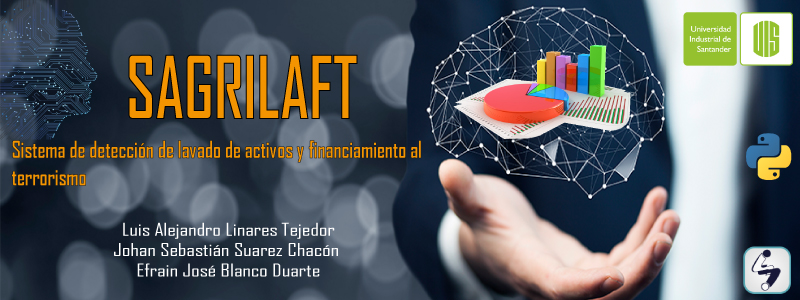

In [1]:
#@title **Librerias utilizadas**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__
from sklearn.model_selection import KFold
from sklearn.metrics import *
from matplotlib import path
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
import time

In [2]:
#@title **Montar el dataset SAGRILAFT**
import os
from google.colab import drive
path = "/content/drive/My Drive/Proyecto"
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto


In [3]:
#@title **Declaramos la hoja que vamos a utilizar**
#@markdown En este proyecto haremos uso de la Hoja 1 del archivo
path = "SAGRILAFT.xlsx"
data_h= pd.read_excel(path, sheet_name='Hoja1')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# ¿Que es?
El Grupo de Acción Financiera Internacional - GAFI, sugiere que las empresas deben diseñar, implementar y poner en marcha un Sistema de Gestión del Riesgo de Lavado de Activos y Financiamiento del Terrorismo (abreviado como SAGRILAFT, y previamente conocido como SARLAFT). Una de las etapas para su implementación es la adopción de “medidas preventivas”, las cuales son controles mínimos sugeridos para la prevención de los riesgos de lavado de activos, la financiación del terrorismo y el contrabando en los procesos de los negocios, y son el punto de partida para realizar una debida diligencia.

<left>
<img src="https://www.clinicasagradocorazon.com.co/wp-content/uploads/2018/09/sar.jpg" width="600"><br>Imagen tomada de la página: <a href="https://www.clinicasagradocorazon.com.co/sarlaftc/">Clínica Sagrado Corazón</a>
</left>





# Plantamiento del problema

El dataset SAGRILAFT contiene información de muchas empresas a nivel nacional por consiguiente no podremos mostrar el dataset de forma didactica debido a que son casos de la realidad por ende reservamos la confidencialidad de la información. El ideal que manejamos como grupo nos llevó a investigar que tipo de problema teniamos en frente, y concluimos que era un problema netamente de clasificación por lo que optamos por usar los clasificadores trabajados durante el semestre y tomar el mejor de ellos comparando los puntajes que nos arroja cada uno y posteriormente usar el metodo mas eficiente que nos ayude a catalogar las empresas con insignificante,bajo y alto riesgo de ser parte de un financiamiento ílicito.

## Modificando los datos de la columna "Segmento"
Para plotear de forma oportuna nuestros datos debemos hacer un cambio en la columna:
* Insignificante = 0
* Bajo = 1
* Alto = 2

In [4]:
data_h[["Segmento"]] = data_h[["Segmento"]].replace("Insignificante", 0)
data_h[["Segmento"]] = data_h[["Segmento"]].replace("Bajo", 1)
data_h[["Segmento"]] = data_h[["Segmento"]].replace("Alto", 2)
clas = data_h[["Segmento"]]

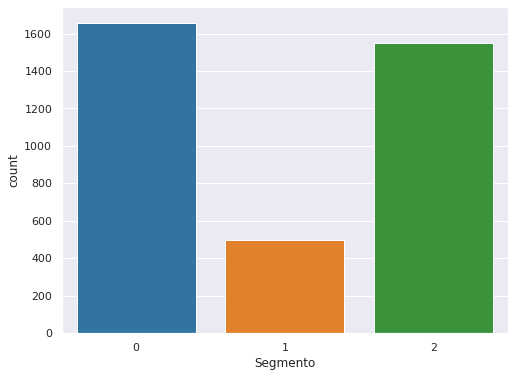

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x="Segmento",data=data_h,palette='tab10')
plt.show()

## Departamentos agrupados por nivel de riesgo

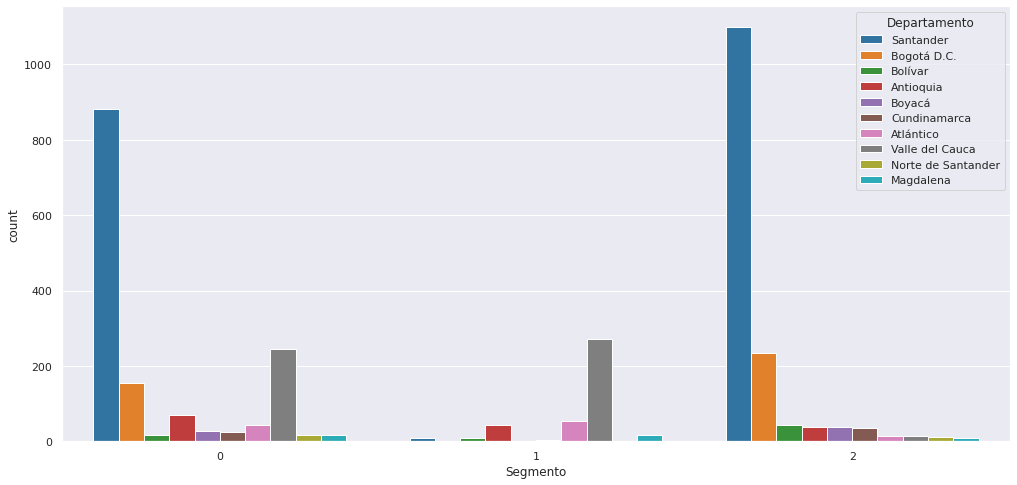

In [6]:
plt.figure(figsize=(17,8))
order_1 = pd.crosstab(data_h.Departamento, data_h.Segmento).sort_values(by=[2], ascending=False, kind='mergesort')[:10].index

sns.countplot(x="Segmento", hue= "Departamento" , data=data_h, hue_order= order_1, palette='tab10')

## **GaussianNB**
En este clasificador las caracteristicas no estan relacionadas unas con otras y debido a esto al hacer la prediccion las variables son independientes entre si, por lo tanto el porcentage es un poco bajo comparado con los demas.


In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
inicio = time.time()

data = data_h[["NCreditosVigentes", "MontosTotales", "SaldosTotales", "Activos", "Pasivos", "Patrimonio", "IngresosMes", "OtrosIngresos", "Egresos", "SaldoAportes", "TotalTrans"]]
data_y = data_h[["Segmento"]]

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, random_state=21)
est = GaussianNB()
est.fit(X_train,y_train)
time.sleep(1)
fin = time.time()

Puntaje= accuracy_score(est.predict(X_test), y_test)
informe = classification_report(est.predict(X_test), y_test)



print(Puntaje)
print()
print(informe)
print(fin-inicio,"Segundos")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7277628032345014

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       320
           1       0.91      0.34      0.50       282
           2       0.40      0.88      0.55       140

    accuracy                           0.73       742
   macro avg       0.76      0.74      0.68       742
weighted avg       0.84      0.73      0.72       742

1.0085017681121826 Segundos


## **Random Forest Classifier**
Es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos. En comparación a Gaussian NB tenemos que:

**Ventaja**: Pueden aprender cualquier correspondencia entre datos de entrada y resultado a predecir.

**Desventaja**: No son buenos extrapolando porque no siguen un modelo conocido.



In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
inicio = time.time()

data = data_h[["NCreditosVigentes", "MontosTotales", "SaldosTotales", "Activos", "Pasivos", "Patrimonio", "IngresosMes", "OtrosIngresos", "Egresos", "SaldoAportes", "TotalTrans"]]
data_y = data_h[["Segmento"]]
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, random_state=21, shuffle= False)
est = RandomForestClassifier(max_depth=10 , n_estimators=200 , random_state=21)
est.fit(X_train,y_train)
time.sleep(1)
fin = time.time()

a = accuracy_score(est.predict(X_test), y_test)
informe = classification_report(est.predict(X_test), y_test)

print(a)
print()
print(informe)
print(fin-inicio,"Segundos")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


0.866576819407008

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       0.26      0.70      0.38        43
           2       0.96      0.78      0.86       391

    accuracy                           0.87       742
   macro avg       0.74      0.83      0.75       742
weighted avg       0.94      0.87      0.89       742

1.661320447921753 Segundos


# **Decision Tree Classifier**



In [9]:
from sklearn.tree import DecisionTreeClassifier
inicio = time.time()

data = data_h[["NCreditosVigentes", "MontosTotales", "SaldosTotales", "Activos", "Pasivos", "Patrimonio", "IngresosMes", "OtrosIngresos", "Egresos", "SaldoAportes", "TotalTrans"]]
data_y = data_h[["Segmento"]]

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, random_state=21, shuffle= False)
est = DecisionTreeClassifier(max_depth=2)
est.fit(X_train,y_train)
time.sleep(1)
fin = time.time()


puntaje1 = accuracy_score(est.predict(X_test), y_test)
informe = classification_report(est.predict(X_test), y_test)

print(puntaje1)
print()
print(informe)
print(fin-inicio," Segundos")

0.8436657681940701

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       0.00      0.00      0.00         0
           2       1.00      0.73      0.85       434

    accuracy                           0.84       742
   macro avg       0.67      0.58      0.62       742
weighted avg       1.00      0.84      0.91       742

1.0132393836975098  Segundos


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Support vector machine**

In [10]:
data = data_h[["NCreditosVigentes", "MontosTotales", "SaldosTotales", "Activos", "Pasivos", "Patrimonio", "IngresosMes", "OtrosIngresos", "Egresos", "SaldoAportes", "TotalTrans"]]
data_y = data_h[["Segmento"]]
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
inicio = time.time()

list_a = []
kernels = ['poly']
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, shuffle=False)
for i in kernels:
  est = SVC(kernel= i ,random_state=21)
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  a = accuracy_score(y_pred, y_test)
  list_a.append(a)
time.sleep(1)
fin = time.time()

informe = classification_report(est.predict(X_test), y_test)

print(list_a)
print()
print(informe)
print(fin-inicio," Segundos")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.4811320754716981]

              precision    recall  f1-score   support

           0       0.99      0.44      0.61       687
           1       0.00      0.00      0.00         0
           2       0.16      0.95      0.28        55

    accuracy                           0.48       742
   macro avg       0.38      0.46      0.30       742
weighted avg       0.93      0.48      0.59       742

5.626174211502075  Segundos


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Conclusiones**

<table class="default">
  <tr>
    <th>Modelo</th>
    <th>Puntaje</th>
  </tr>
  <tr>
    <td>GaussianNB</td>
    <td>0.72</td>
  </tr>
  <tr>
    <td>Random Forest Classifier</td>
    <td>0.86</td>
  </tr>
  <tr>
    <td>Decision Tree Classifier</td>
    <td>0.84</td>
  </tr>
  <tr>
    <td>Super Vector Machine</td>
    <td>0.48</td>
  </tr>
</table>

* Podemos destacar dentro de las comparaciones realizadas que el SVC nos arroja un puntaje muy bajo comparado con los otros 3 metodos utilizados y por otra parte el Random Forest Classifier fué el mejor puntaje en el Accuracy.

* Pudimos evaluar el uso de algoritmos de aprendizaje de máquina para desarrollar alertas tempranas de riesgo de lavado de activos y financiamiento del terrorismo a nivel nacional.